### About Dataset

Nowadays as Giving Loan to a person is equally like taking risk for a bank , that whether the person will be able to repay the loan or not,
because It is not possible for the bank-people to have history of all the people who apply for the loan, like whether they are defaulter or not,

So in this Loan Application Status Prediction dataset we are provided with many attributes like maritial status, Employment status ,Loan amount,
his own credit history and many more information about the  loan applicants in order to study the make a model that will predict whether it is 
the loan should be grant or Not

### Importing Libraries

In [61]:
import pandas as pd
import numpy as np


### Loading dataset

In [62]:
df=pd.read_csv('loan_application_status_prediction.csv')

### Basic Insights of the Dataset

In [63]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
# checking the datatypes of the dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [65]:
# checking the dimension of the datset
df.shape

(614, 13)

In [66]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## About Columns

Loan_ID              ->   Loan_Id is the Unique Identification number given to each loan

Gender               ->   Gender describes whether the applicant is male or female

Married              ->   it describes whether the applicant is married or unmarried

Dependents           ->  it tells how many dependent are there on the applicant

Education            -> It describes the education whether he is graduated, ungraduacted , 10th pass, 12th pass and so on

Self_Employed        ->  It telles whether the applicant is self employed or not

ApplicantIncome      ->  It descibes the income of applicant

CoapplicantIncome    ->  It descibes the income of Co-applicant

LoanAmount           -> It is the loan amount the applicant asks for

Loan_Amount_Term     -> Loan_amount_term it is the number of months 

Credit_History       -> Credit_history shows whether the applicant has taken loan before or not

Property_Area        -> property area generally refers to the area which applicant is keeping as mortgage

Loan_Status          -> it states whether the loan was approved or Not


# Identifying and Treating Missing values

In [67]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Visualizing Null Values

<AxesSubplot:>

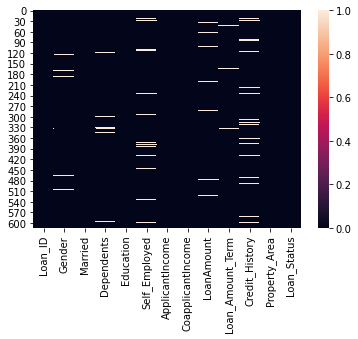

In [68]:
import seaborn as sns
sns.heatmap(df.isnull())

The White lines in the heatmap indicates the presence of  Null Values in the dataset

Male      489
Female    112
Name: Gender, dtype: int64


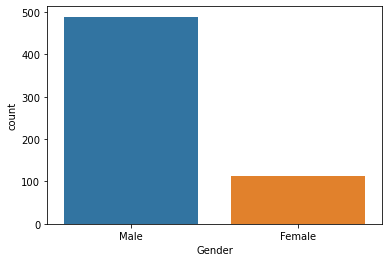

In [69]:
sns.countplot(x=df['Gender'])
print(df['Gender'].value_counts())

###### There are 489 Males , and 112 Females 

Yes    398
No     213
Name: Married, dtype: int64


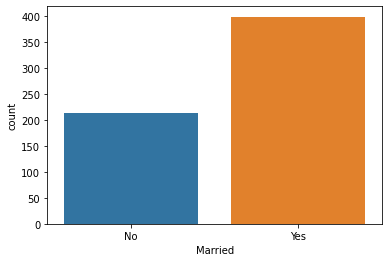

In [70]:
sns.countplot(x=df['Married'])
print(df['Married'].value_counts())

398 Applicants are married and and 213 are unmarried

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


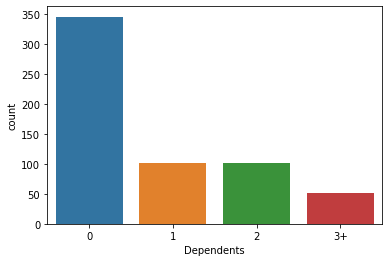

In [71]:
sns.countplot(x=df['Dependents'])
print(df['Dependents'].value_counts())

350 Applicants have no dependent on them, 102 Applicants have 1 dependent,  101 applicants have 2 dependent and 51 applicants have 3+ dependent on them

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


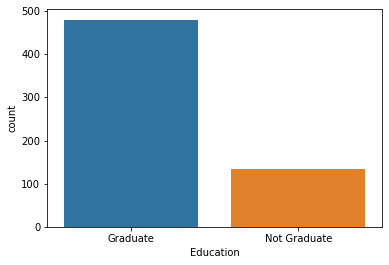

In [72]:
sns.countplot(x=df['Education'])
print(df['Education'].value_counts())

480 applicants are Graduated. 134 applicants are not graduated

No     500
Yes     82
Name: Self_Employed, dtype: int64


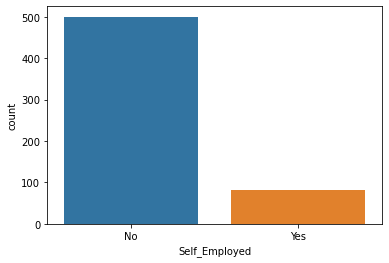

In [73]:
sns.countplot(x=df['Self_Employed'])
print(df['Self_Employed'].value_counts())

500 Applicants are not self-employeed and 82 Applicants are not self-employeed

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


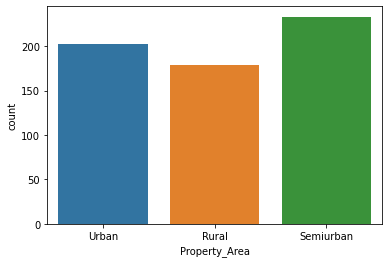

In [74]:
sns.countplot(x=df['Property_Area'])
print(df['Property_Area'].value_counts())

233 applicants property  is in semiurban, 

202 applicants have propperty in Urban area

and 179 applicants have property in Rural area

Y    422
N    192
Name: Loan_Status, dtype: int64


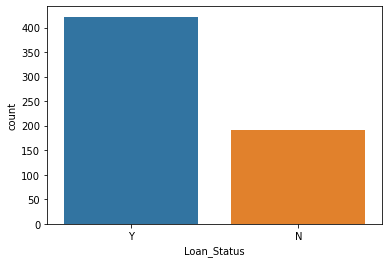

In [75]:
sns.countplot(x=df['Loan_Status'])
print(df['Loan_Status'].value_counts())

422 applicants has got the loan and 192 applicants have not got the loan

<AxesSubplot:ylabel='Frequency'>

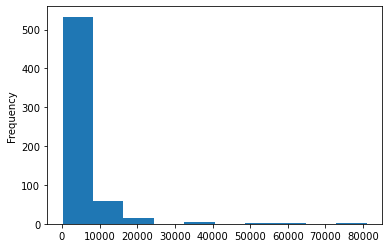

In [76]:
df['ApplicantIncome'].plot.hist()


more than 500 applicant have income between 0 to 10000

<AxesSubplot:ylabel='Frequency'>

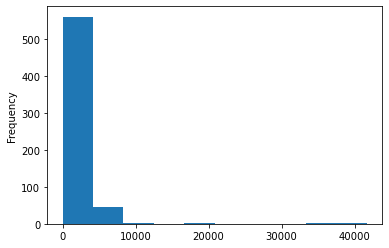

In [77]:
df['CoapplicantIncome'].plot.hist()

more than 500 Coapplicants Income is around 0 to 5000

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64


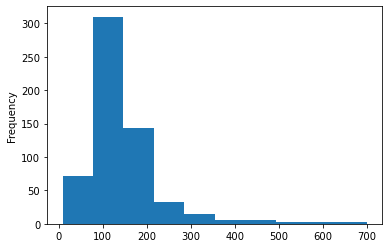

In [78]:
df['LoanAmount'].plot.hist()
print(df['LoanAmount'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


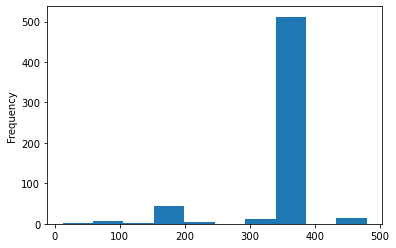

In [79]:
df['Loan_Amount_Term'].plot.hist()
print(df['Loan_Amount_Term'].value_counts())

More than 512 applicant wants loan for 360 months i.e 30 years, 44 applicants wants loan for 180 months i.e., 15 years and so on 

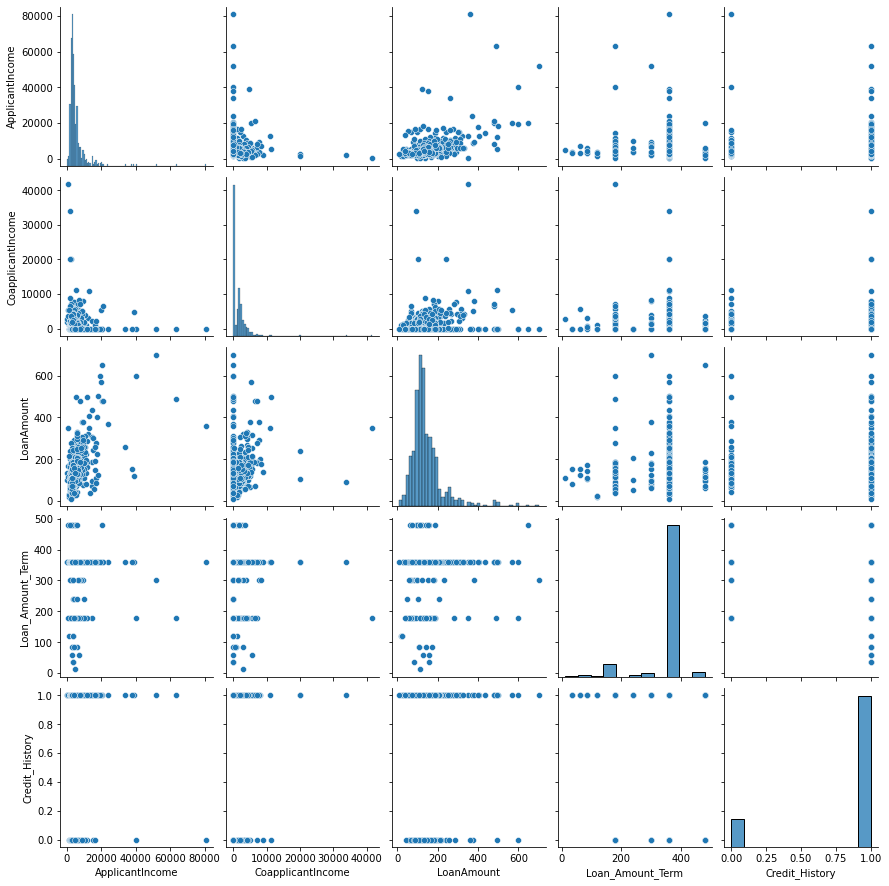

In [80]:
sns.pairplot(df)

### Simple Imputing 

Simple-Imputing is the process in which the null values of the columns are treated with various strategies like mode ,most-frequent ,median or mean sometimes

In [81]:
# treating missing or null values of categorical data
from sklearn.impute import SimpleImputer


list1=['Gender','Married','Dependents','Self_Employed','Credit_History']
for i in list1:
    imp=SimpleImputer(strategy="most_frequent")
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


#### Replacing Null values with median in numerical columns

In [82]:
list2 =['LoanAmount','Loan_Amount_Term']
for i in list2:
    df[i]=df[i].replace(np.nan,df[i].median())

###### Rechecking Null Values after treating them

In [83]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Label Encoding

Turning Categorical variables into Numerical Variables

In [84]:
# As all the columns are of Object type its better to convert them labelly for better learning of the Model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes == object:
        df[i]=le.fit_transform(df[i].astype(str))

In [85]:
# rechecking data types after converting them
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### Descriptive Statistics

describe() method in python describes the basic features of the data,

It gives short summaries aboout the dataset and measures of the dataset like No of items , mean , Standard_Deviation , minimum value of 
dataset, 25th, 50th(median) and 75% percentile of each  column and Gives the maximum value of the dataset too

In [86]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observations :-
    
1) There is a significant difference between 75% and max of  ApplicantIncome , CoapplicantIncome and LoanAmount indicating the presence of Outliers

2) In ApplicantIncome , CoapplicantIncome , LoanAmount the standard deviation is too high it means skewness is also present in the dataset


## Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [87]:
dfcor=df.corr()

<AxesSubplot:>

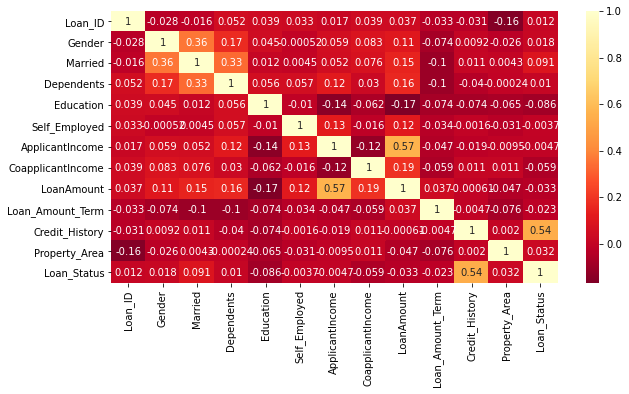

In [88]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(10,5))
sns.heatmap(dfcor, cmap="YlOrRd_r", annot=True)

Observations :-

1) Loan-Status is strongly positive correlated with Credit-History

2) Loan-status is negatively correlated with Education

## Checking Outliers 

Outliers are the values that fall really outside the range of the data, and it is checked through two methods zscore and IQR

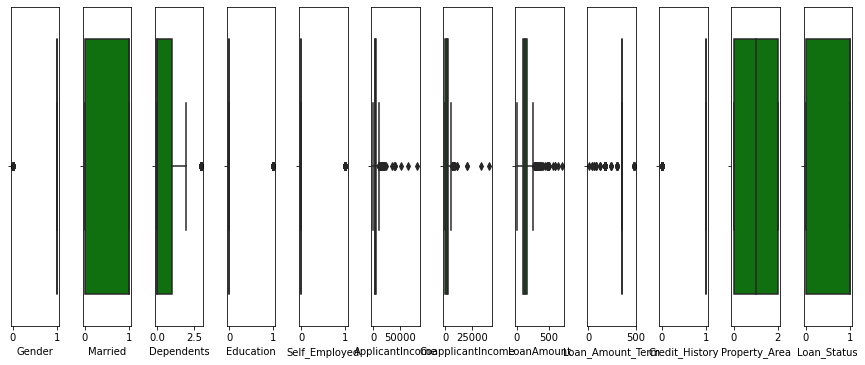

In [89]:
collist=df.columns.values
ncol=13
nrows=13


plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(ncol,nrows,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

Observation :-

1)As Gender, Education ,Self-Employed, Credit-History have only two values in them like Male/Female , Yes/No , OR 1/0 that's why columns are showing no outliers

2)Besides Married , Property_Area , Loan_status also had two values with them that's why columns are showing no outliers.

3)As mentioned above ApplicationIncome , Loan_Amount, CoapplicantIncome,Loan_Amount_Term have Outliers in them



In [90]:
# statistically checking Outliers through zscore.
from scipy.stats import zscore
z=np.abs(zscore(df))

In [91]:
df_new=df[(z<3).all(axis=1)]

In [92]:
df_new.shape

(577, 13)

It can be observed that as per zscore all columns are removed on the basis of Outliers, so dropping the idea of  removing Outliers

### Checking Skewness

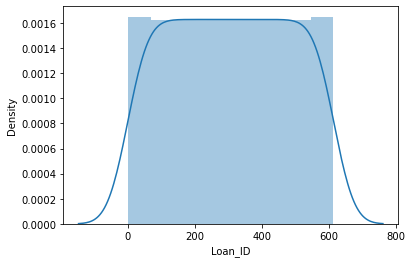

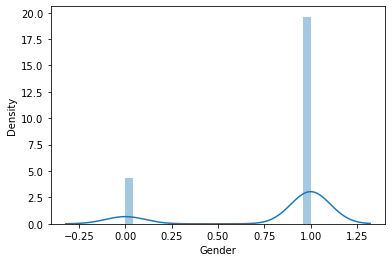

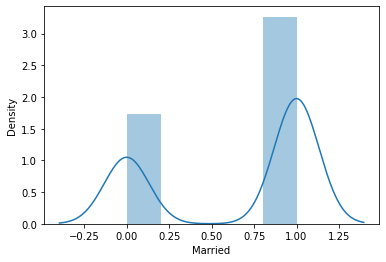

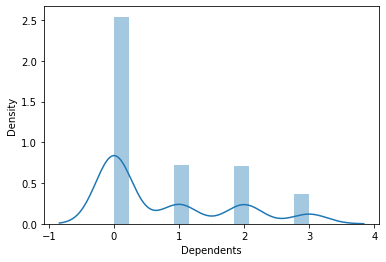

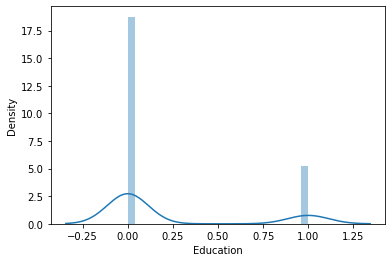

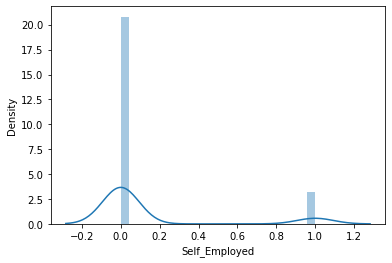

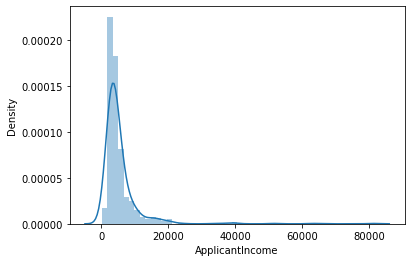

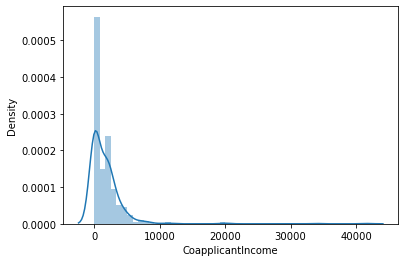

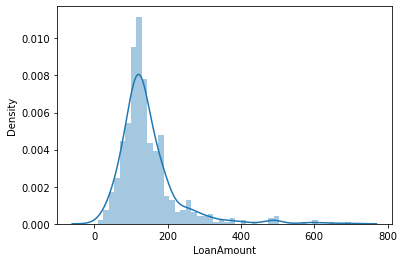

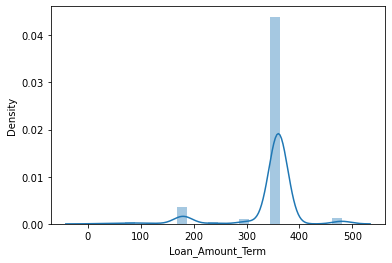

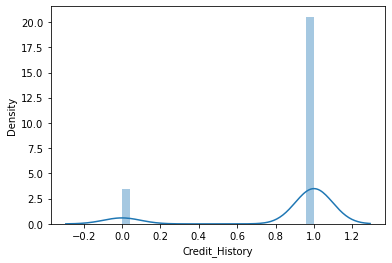

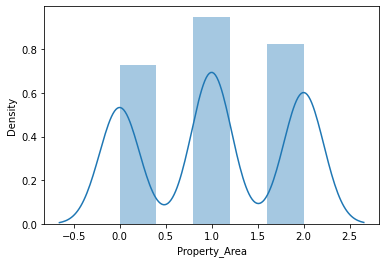

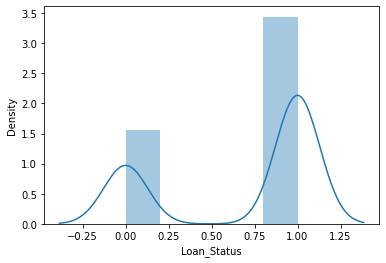

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Visually it can be observed that dependents ,ApplicantIncome,  CoapplicantIncome, Loan Amount are  skewed

In [94]:
# stastistically checking the skew with skew() method
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

As the skew score of many columns is above 0.5, it simply implies that skewness is present in the dataset and it should be treated
after separating x and Y

## Dropping the column

As the Loan_Id column is Unique Loan Identification Number , it means there is unique loan_id on each rows, and 
it will not contribute much in the model learning so it should be dropped

In [95]:
df.drop('Loan_ID',axis=1,inplace=True)

### Separating X (Independent Variables) and Y (Dependent Variables)

In [96]:
x=df.drop('Loan_Status',axis=1)
x.head()
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


As there was skewness present in the dataset , it is necessary to treat them so treating it with Power_Transform

In [97]:
from sklearn.preprocessing  import power_transform

df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [98]:
x=df_new
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,-0.025462,0.175540,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.025462,0.175540,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.339826,0.175540,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.155876,0.175540,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.170931,0.175540,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.197589,0.175540,0.411733,-1.350003
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.296436,-2.312879,0.411733,-1.350003
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.381387,0.175540,0.411733,1.193567
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.750522,0.175540,0.411733,1.193567


In [99]:
y=df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

## Finding The best Random State for LogisticRegression model and training it

In [101]:
maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    accuracy=accuracy_score(y_test,predlg)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

maximum accuracy  is :  0.8897058823529411 and best random state is 955


###### Maximum Accuracy is found at the Random_state of 955

In [102]:
from sklearn.linear_model import LogisticRegression

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=955)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8897058823529411
[[ 19  13]
 [  2 102]]
              precision    recall  f1-score   support

           0       0.90      0.59      0.72        32
           1       0.89      0.98      0.93       104

    accuracy                           0.89       136
   macro avg       0.90      0.79      0.82       136
weighted avg       0.89      0.89      0.88       136



###### LogisticRegression Model has got the accuracy of  88%

## Finding the best random_state for DecisionTreeClassifier Model and training it

In [103]:
from sklearn.tree import DecisionTreeClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    accuracy=accuracy_score(y_test,preddtc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

maximum accuracy  is :  0.8161764705882353 and best random state is 895


In [116]:
from sklearn.tree import DecisionTreeClassifier

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=895)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8235294117647058
[[30 11]
 [13 82]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.88      0.86      0.87        95

    accuracy                           0.82       136
   macro avg       0.79      0.80      0.79       136
weighted avg       0.83      0.82      0.82       136



###### DecisionTreeClassifier has got the accurcay of 82 %

## Finding the best random_state for RandomForestClassifier and training it

In [108]:
from sklearn.ensemble import RandomForestClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    accuracy=accuracy_score(y_test,predrfc)
    #print(f"accuracy is {accuracy} at random_state {i}")
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy  is :  {maxaccuracy} at random state of  {best_random_state}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy  is :  0.7720588235294118 at random state of  1
accuracy  is :  0.8235294117647058 at random state of  3
accuracy  is :  0.8602941176470589 at random state of  8
accuracy  is :  0.875 at random state of  158
maximum accuracy  is :  0.875 and best random state is 158


In [117]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=158)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))


0.8529411764705882
[[22 16]
 [ 4 94]]
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.85      0.96      0.90        98

    accuracy                           0.85       136
   macro avg       0.85      0.77      0.80       136
weighted avg       0.85      0.85      0.84       136



###### RandomForestClassifier Model has got the accuracy of 86 %

## Finding the best random_state on SVC and training it

In [110]:
from sklearn.svm import SVC


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    accuracy=accuracy_score(y_test,predsvc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

maximum accuracy  is :  0.8897058823529411 and best random state is 681


In [111]:
from sklearn.svm import SVC

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=681)
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8897058823529411
[[25 14]
 [ 1 96]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77        39
           1       0.87      0.99      0.93        97

    accuracy                           0.89       136
   macro avg       0.92      0.82      0.85       136
weighted avg       0.90      0.89      0.88       136



###### SupportVectorClass Model has got the accuracy of 88%

## Cross Validation of all the models and finding best cv

#### Cross-Validation

sometimes it is possible that model may be overfitted or underfitted, so cross_validation technique is used to cross-check whether the model has learnt properly or not

##### Finding the best CV value

In [118]:
# checking the cross-validation-score of the logistic model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.8110749185667753 
 At  cross fold 3  the cv_core is 0.8062171209947394 
 At  cross fold 4  the cv_core is 0.8078686019862489 
 At  cross fold 5  the cv_core is 0.8061975209916034 
 At  cross fold 6  the cv_core is 0.8078558284155085 
 At  cross fold 7  the cv_core is 0.8095051500223914 
 At  cross fold 8  the cv_core is 0.80622009569378 
 At  cross fold 9  the cv_core is 0.8094629156010229 


###### the highest cross_val_score of LogisticRegression is 80.95 at cv=7

In [119]:
# checking the cross-validation-score of the DecisionTreeClassifier model is 
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.6905537459283387 
 At  cross fold 3  the cv_core is 0.6889048302247728 
 At  cross fold 4  the cv_core is 0.6939033189033189 
 At  cross fold 5  the cv_core is 0.7199386911901905 
 At  cross fold 6  the cv_core is 0.6937147027095628 
 At  cross fold 7  the cv_core is 0.7067099567099567 
 At  cross fold 8  the cv_core is 0.7100991114149009 
 At  cross fold 9  the cv_core is 0.7197830823150517 


###### the highest cross_val_score of DecisionTreeClassifier is 71.99 at cv=5

In [120]:
# checking the cross-validation-score of the RandomForestClassifier model is
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.7866449511400652 
 At  cross fold 3  the cv_core is 0.7866411605292524 
 At  cross fold 4  the cv_core is 0.7850564468211527 
 At  cross fold 5  the cv_core is 0.7817806210848993 
 At  cross fold 6  the cv_core is 0.7915635509867376 
 At  cross fold 7  the cv_core is 0.7883079564114047 
 At  cross fold 8  the cv_core is 0.7867182159945317 
 At  cross fold 9  the cv_core is 0.7899497963436581 


###### the highest cross_val_score of LogisticRegression is 79.15 at cv=6

In [124]:
# checking the cross-validation-score of the SVC model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.8061889250814332 
 At  cross fold 3  the cv_core is 0.8094771241830067 
 At  cross fold 4  the cv_core is 0.8095025889143537 
 At  cross fold 5  the cv_core is 0.8094495535119284 
 At  cross fold 6  the cv_core is 0.8078241005139919 
 At  cross fold 7  the cv_core is 0.8078444543961785 
 At  cross fold 8  the cv_core is 0.8078434723171566 
 At  cross fold 9  the cv_core is 0.8078052477029458 


###### the highest cross_val_score of LogisticRegression is 80.95 at cv=4

## Comparing the Accuracy and Cross_Val_Score of all the models

In [ ]:

#  MODEL                       ACCURCAY             CROSS_VAL_SCORE                DIFFERENCE
# Logistic Regression           88                       80.95                           7.15
# DecisionTreeClassifier        81                       71.95                           9.04  
# RandomForestClassifier        85                       79.15                           5.84
# SupportVectorClass            88                       80.95                           7.15

 as we can see that Logistic Regression and SupportVectorClass has got the same accuracy and same cross_val_score ,
 
 so we can go with any of this model, but as the classification is of two variables , so I will go with Logistic Regression,
 as Logistic regression is mostly  used for binary_classification and SVC supports multiple classification.
 
 finally trainig our model further with Logistic Regression
    
    
    

## Hyper-Parameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV
 # creating parameter list to pass in GridSearchCV
parameters ={'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'dual' :[True ,False],
             'class_weight': ['dict','balanced']

            }

In [129]:
lggscv=GridSearchCV(LogisticRegression(),parameters,cv=7)

In [130]:
lggscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [131]:
lggscv_pred=lggscv.best_estimator_.predict(x_test)

In [132]:
accuracy_score(y_test,lggscv_pred)

0.875

# Exporting Model

In [133]:
import pickle
filename='loan_application_status_LG.pkl'
pickle.dump(lggscv.best_estimator_,open(filename,'wb'))

###### Loading model for cross check 

In [134]:
loaded_model=pickle.load(open('loan_application_status_LG.pkl','rb'))
result=loaded_model.score(x_test,y_test)

print(result)

0.875


In [135]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],lggscv_pred[:]],index=["Predicted","Original"])

In [136]:
conclusion      

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
Predicted,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Original,1,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1


###### as you can compare that predicted and Orginal values are same , it means that our model has learnt well